# With this simple Python code, I will estimate the efficient frontier of a portfolio compound by 2 stocks traded at Sao Paulo Stock Exchange, Brazil.  The first thing that I have done is downloading historical data for Itausa (ticker ITSA4),  and CPFL, (ticker CPFE3); we could have also used the online api provided by YahooFinance. I use the Anaconda Navigator, which is a pretty complete package for analysing financial or any orther type of data. The code will be written on next lines, hope it can be repplied by anyone willing to measure returns of any stock or any other matter.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco

%matplotlib inline

In [3]:
assets = ['ITSA4', 'CPFE3']

pf_data = pd.read_csv('Pfolio_stocks_br.csv', index_col = 'Date')

In [4]:
pf_data.tail()

,ITSA4,CPFE3
Date,,
6/15/20,9.56,31.600000
6/16/20,9.76,31.170000
6/17/20,9.93,31.959999
6/18/20,10.25,31.690001
6/19/20,10.41,NaN


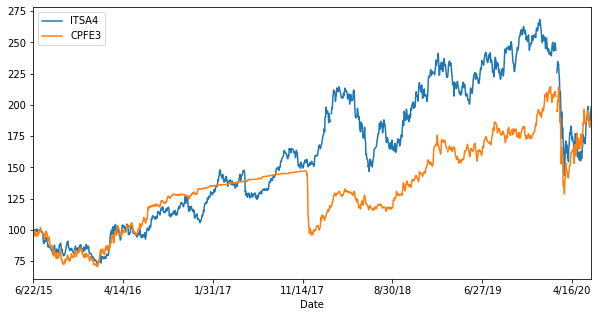

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

ITSA4    0.147460
CPFE3    0.137019
dtype: float64

In [8]:
log_returns.corr()

,ITSA4,CPFE3
ITSA4,1.000000,0.473569
CPFE3,0.473569,1.000000


In [9]:
num_assets = len(assets)

In [10]:
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.20587716, 0.68528263])

In [12]:
arr[0] + arr[1] 

0.891159789942969

In [13]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.51284406, 0.48715594])

In [14]:
weights[0] + weights[1] 

1.0

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.14237364702039487

In [16]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.07043216518813052

In [17]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.2653905898635641

In [18]:
portfolio_returns = []
portfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

portfolio_returns, portfolio_volatilities

([0.13918142128342958,
  0.14608250226808095,
  0.141825318906417,
  0.14348980831712654,
  0.14440799232788298,
  0.14032935605113825,
  0.14349873097948815,
  0.1421997533939765,
  0.14187651242506585,
  0.1437686266137698,
  0.14022533720156122,
  0.13994865754284405,
  0.1429918564776277,
  0.14279283932148568,
  0.142806073076945,
  0.14474139807202852,
  0.14466079329276893,
  0.13712258014712025,
  0.13889878287649152,
  0.14293524983777825,
  0.14335020792718603,
  0.14019728340670248,
  0.143930271829437,
  0.14339830323658717,
  0.14485848355292344,
  0.14685616904420723,
  0.1415396585987,
  0.14233295436000618,
  0.14119013659585508,
  0.13966743764788317,
  0.14272188644653722,
  0.14151378672792894,
  0.1460377909898331,
  0.1374783341133764,
  0.1397480100774842,
  0.1423369957547572,
  0.14160183211993838,
  0.1431626561668695,
  0.14402650060461886,
  0.13758265364094585,
  0.1418546527317472,
  0.1429493737831866,
  0.1412352804044898,
  0.143748152785424,
  0.1387360

In [19]:
portfolio_returns = []
portfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

portfolio_returns, portfolio_volatilities

(array([0.14071914, 0.14241859, 0.14722607, 0.14431042, 0.14080762,
        0.14250618, 0.13779474, 0.13933709, 0.13956213, 0.1446447 ,
        0.14456818, 0.14662261, 0.14647799, 0.14288029, 0.14385656,
        0.14315974, 0.13858829, 0.14419663, 0.14417545, 0.14205763,
        0.13917155, 0.14028368, 0.14152122, 0.14439128, 0.13877285,
        0.14580629, 0.14590032, 0.1410109 , 0.14357605, 0.14030376,
        0.1432547 , 0.13990447, 0.14138749, 0.13758129, 0.14472065,
        0.1387743 , 0.14303217, 0.14281892, 0.14202927, 0.14168462,
        0.14307349, 0.13990594, 0.14123555, 0.14201763, 0.13984428,
        0.14053145, 0.14121108, 0.14396252, 0.14678714, 0.14739342,
        0.1411131 , 0.14295603, 0.14252546, 0.14459959, 0.14641025,
        0.14392596, 0.13961704, 0.14428353, 0.14147838, 0.14590797,
        0.14466199, 0.14375757, 0.14661535, 0.14056571, 0.14209988,
        0.13867022, 0.14684407, 0.13749828, 0.14164991, 0.14591441,
        0.1441557 , 0.13952867, 0.13871113, 0.13

In [20]:
portfolios = pd.DataFrame({'Returns': portfolio_returns, 'Volatility': portfolio_volatilities})

In [21]:
portfolios.head()

,Returns,Volatility
0,0.140719,0.263230
1,0.142419,0.265582
2,0.147226,0.320959
3,0.144310,0.279658
4,0.140808,0.263102


In [22]:
portfolios.tail()

,Returns,Volatility
995,0.139203,0.269616
996,0.139956,0.265463
997,0.138076,0.279254
998,0.146118,0.302875
999,0.146259,0.305025


Text(0, 0.5, 'Expected Return')

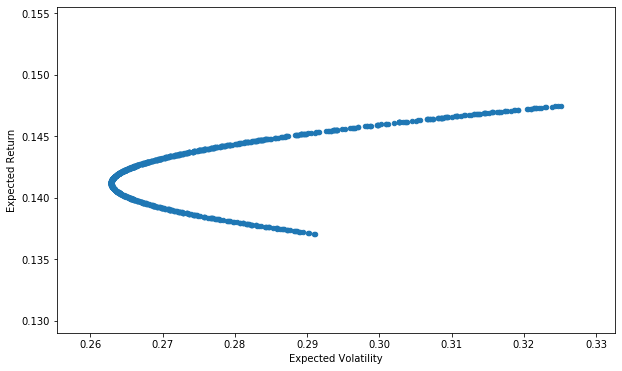

In [23]:
portfolios.plot(x='Volatility', y='Returns', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')